In [488]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime

from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedKFold
from xgboost import XGBRegressor
from xgboost import plot_importance


pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 50)



plt.rcParams['figure.figsize'] = [10, 5]


# Loading of Dataset

In [489]:
train=pd.read_csv('//Users//pranjal//Downloads//ltfs//train.csv')
test=pd.read_csv('//Users//pranjal//Downloads//ltfs//test.csv')


train['is_train'] = 1
test['is_train'] = 0

train.head(25)
test.head(25)

combined_df = pd.concat([train.drop('loan_default', axis=1), test])
combined_df

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,is_train
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,1
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,16-09-18,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,1
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,05-09-18,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,1
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,16-09-18,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,1


In [490]:
train.head(25)
#test.head(25)



,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,is_train
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0,1
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,16-09-18,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0,1
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,05-09-18,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0,1
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,16-09-18,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0,1


In [491]:

train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,is_train
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.0
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071,1.0
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252,0.0
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.0
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000,1.0


In [492]:
all_columns = train.columns
all_columns

UniqueIDs_to_drop_from_train =pd.Series([])

features = [ 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       ]

target = 'loan_default'

numerical_combined_df = combined_df.select_dtypes(include = ['float64', 'int64'])
various_ids = ['branch_id',
       'supplier_id', 'manufacturer_id']

location_ids = ['Current_pincode_ID', 'State_ID']

id_prood_columns = []

primary_acc_columns =['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT']

secondary_acc_columns =['SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'SEC.INSTAL.AMT']

other_numbers = ['NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH']

# Exploratory Data Analysis

### Scatter Plots

UniqueID


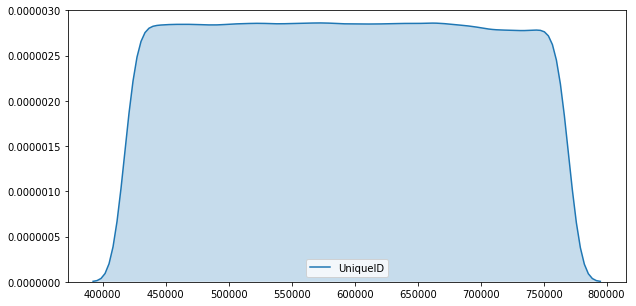

disbursed_amount


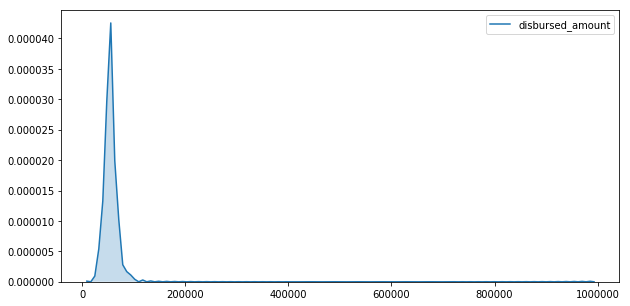

asset_cost


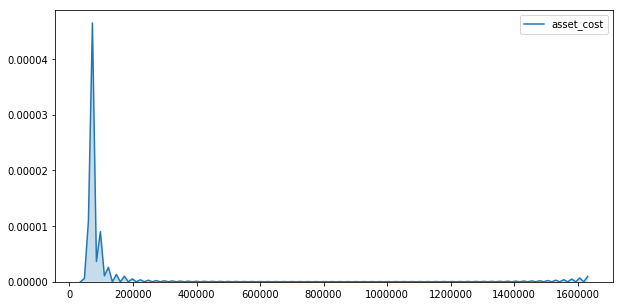

ltv


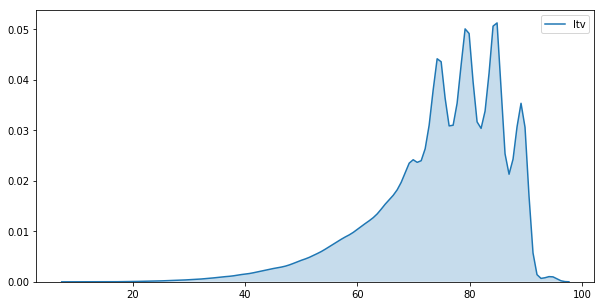

branch_id


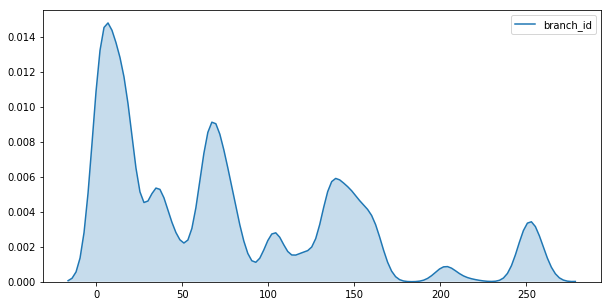

supplier_id


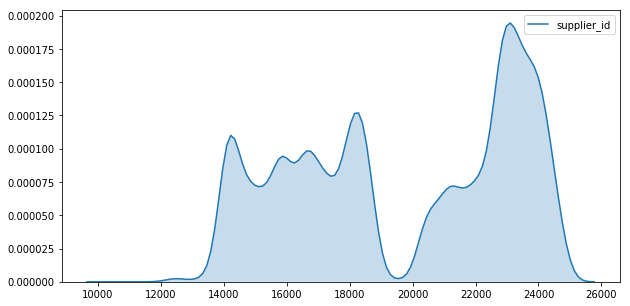

manufacturer_id


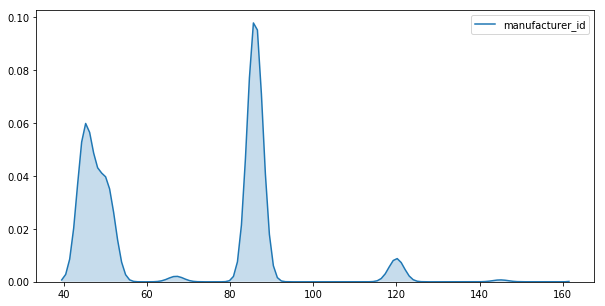

Current_pincode_ID


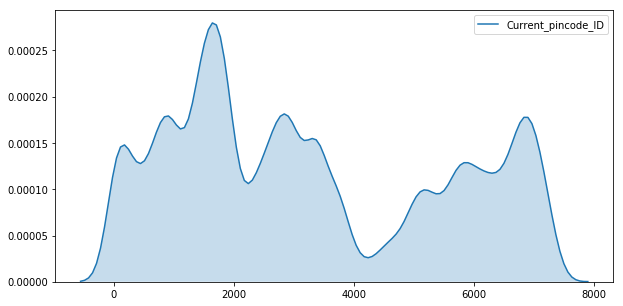

State_ID


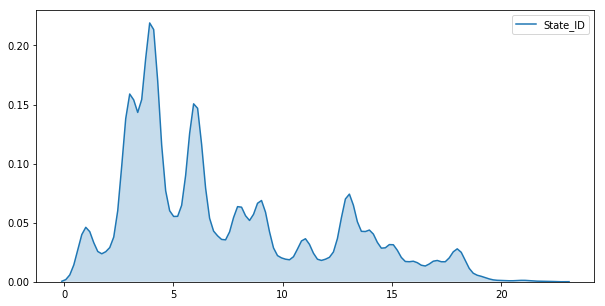

Employee_code_ID


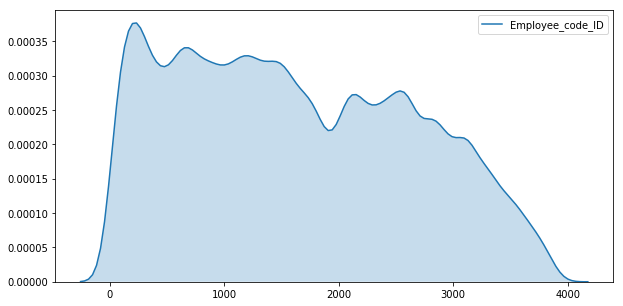

MobileNo_Avl_Flag


/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


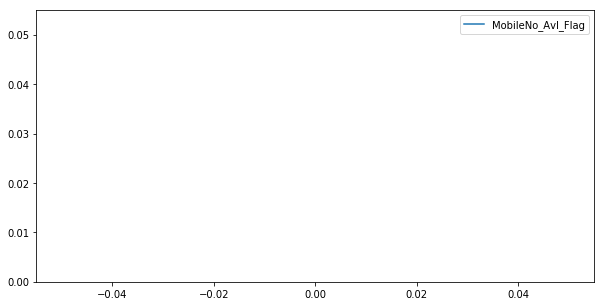

Aadhar_flag


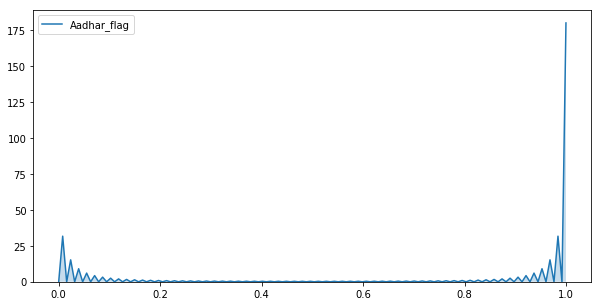

PAN_flag


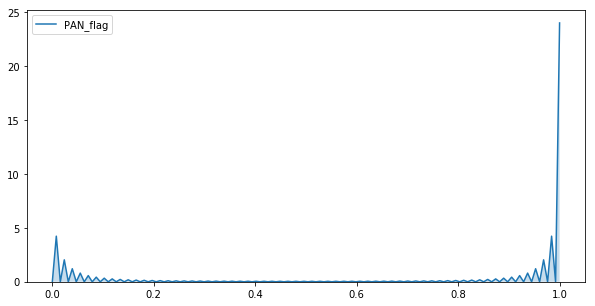

VoterID_flag


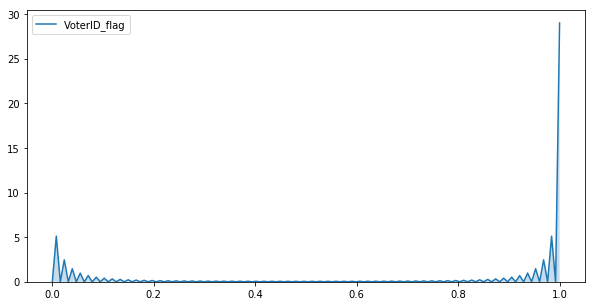

Driving_flag


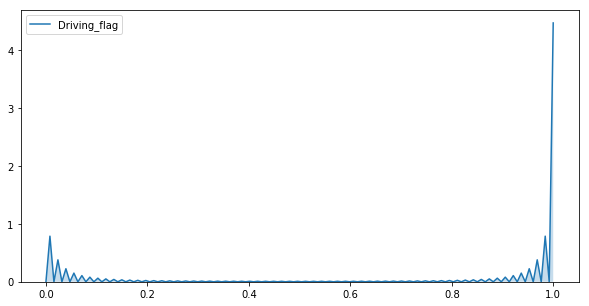

Passport_flag


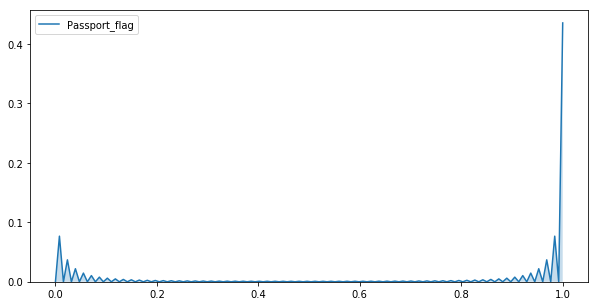

PERFORM_CNS.SCORE


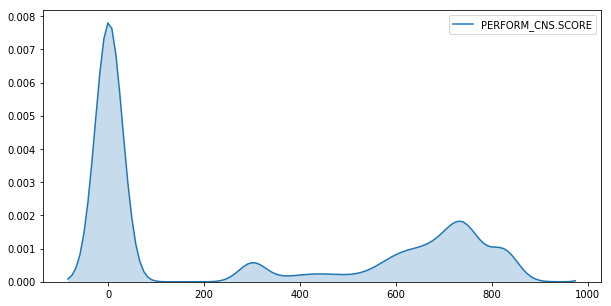

PRI.NO.OF.ACCTS


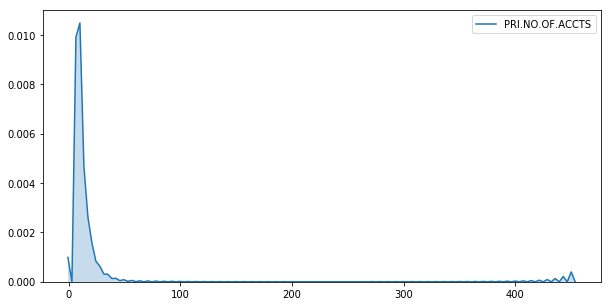

PRI.ACTIVE.ACCTS


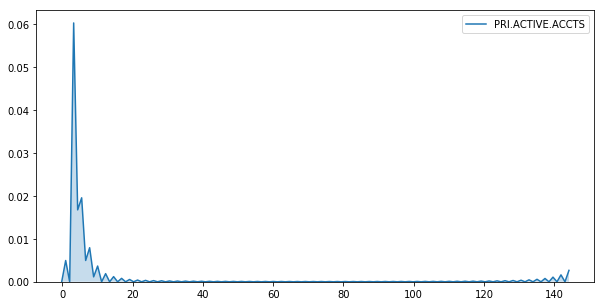

PRI.OVERDUE.ACCTS


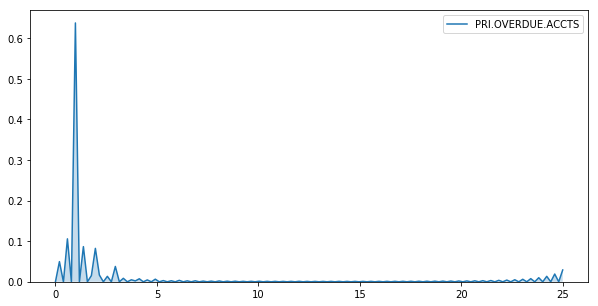

PRI.CURRENT.BALANCE


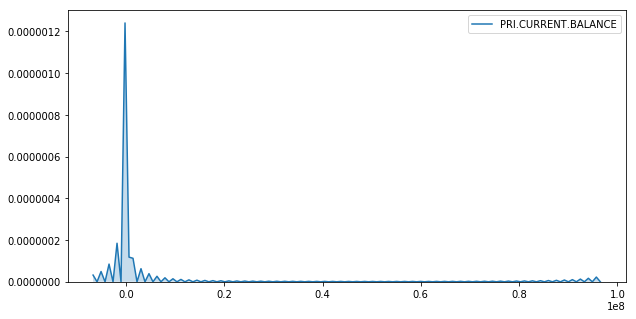

PRI.SANCTIONED.AMOUNT


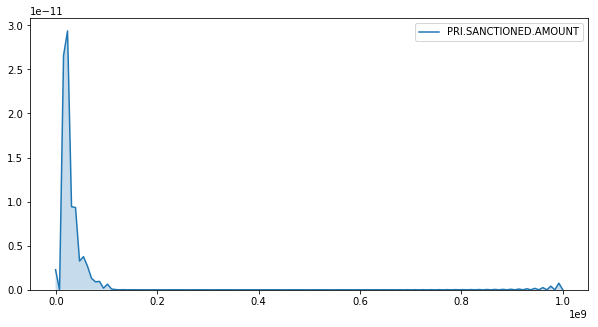

PRI.DISBURSED.AMOUNT


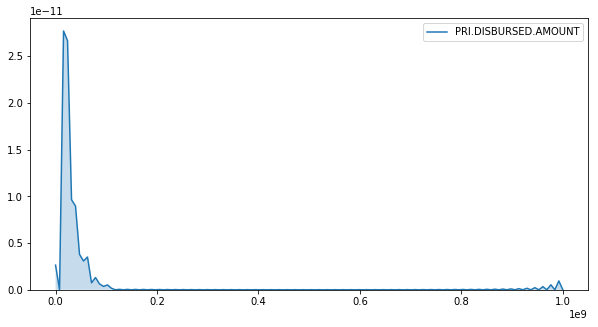

SEC.NO.OF.ACCTS


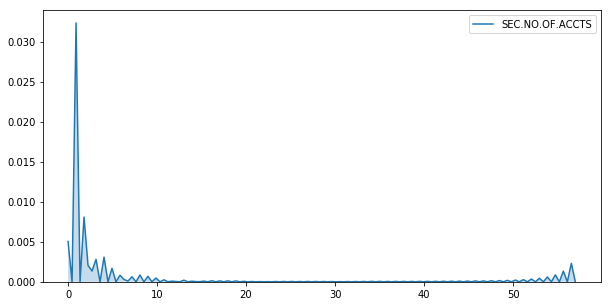

SEC.ACTIVE.ACCTS


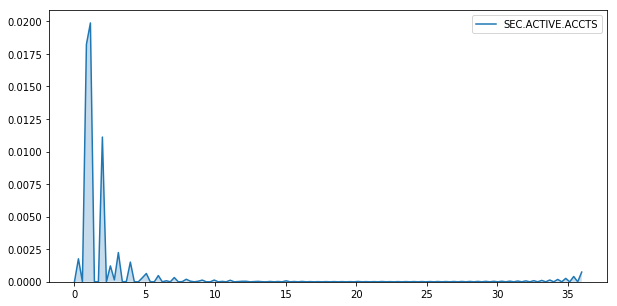

SEC.OVERDUE.ACCTS


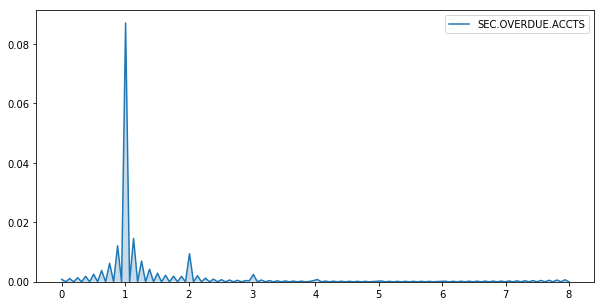

SEC.CURRENT.BALANCE


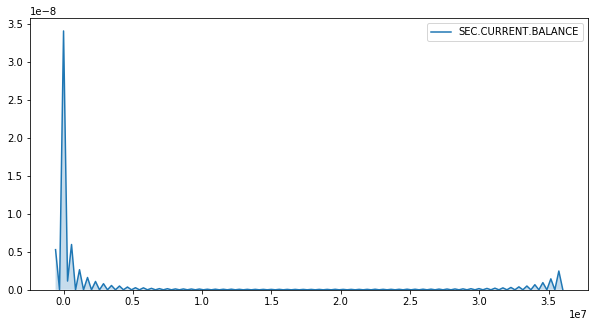

SEC.SANCTIONED.AMOUNT


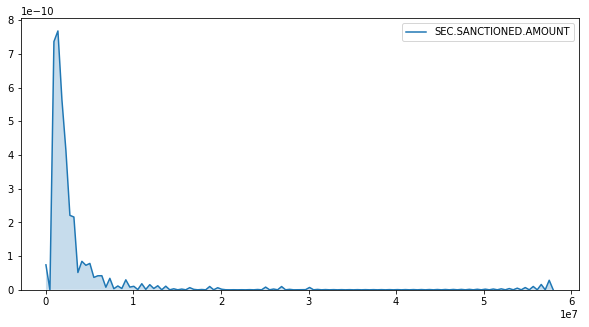

SEC.DISBURSED.AMOUNT


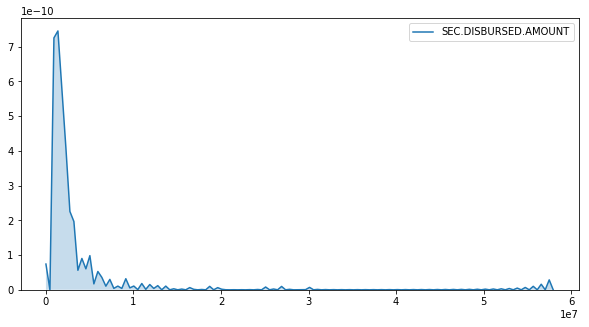

PRIMARY.INSTAL.AMT


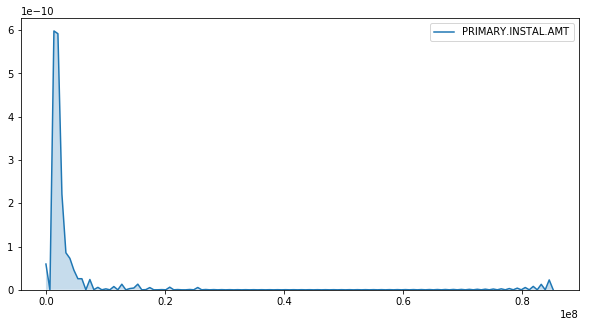

SEC.INSTAL.AMT


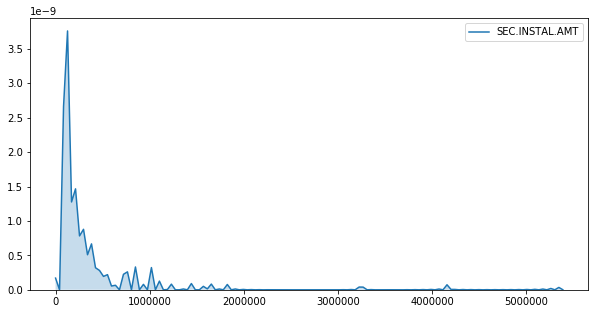

NEW.ACCTS.IN.LAST.SIX.MONTHS


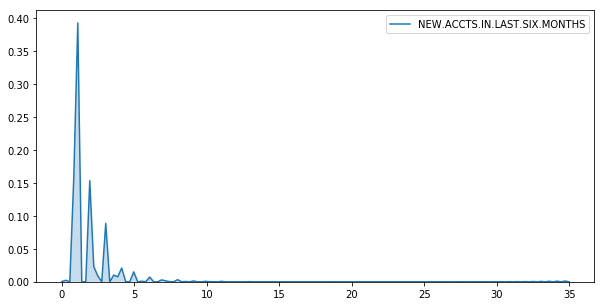

DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS


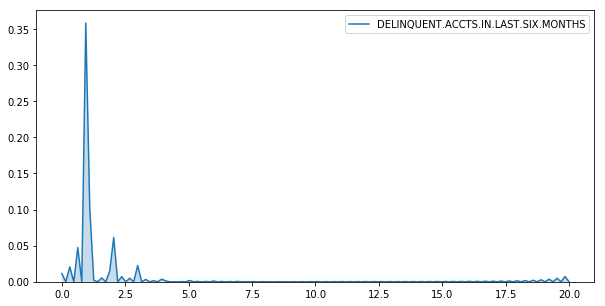

NO.OF_INQUIRIES


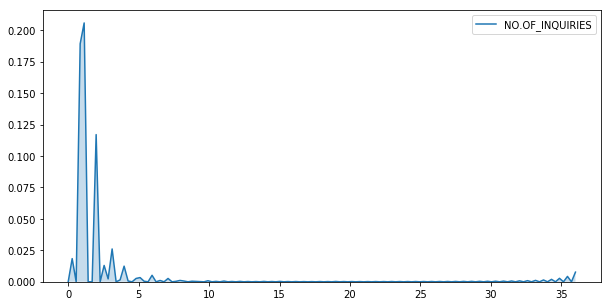

is_train


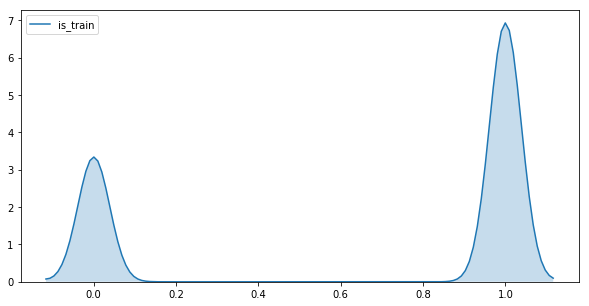

In [231]:
for i, feature in enumerate(numerical_combined_df.columns):
    print(feature)
    sns.kdeplot(numerical_combined_df[feature], shade = True)
    plt.show()



UniqueID


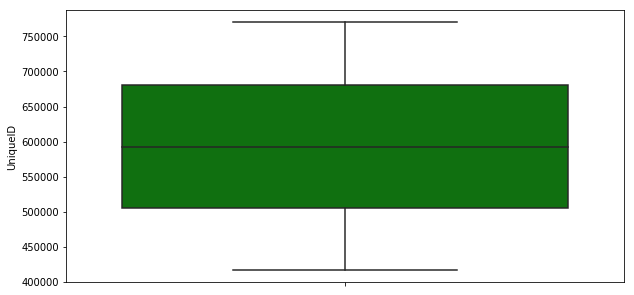

disbursed_amount


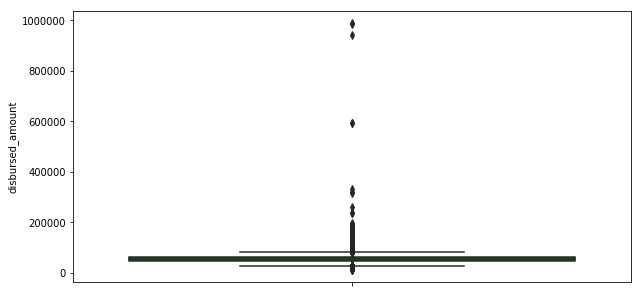

asset_cost


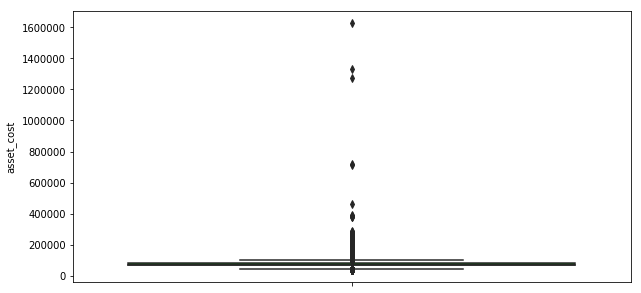

ltv


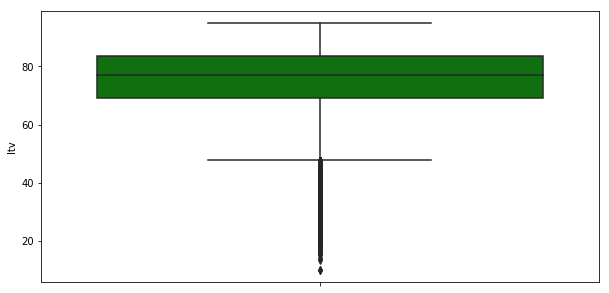

branch_id


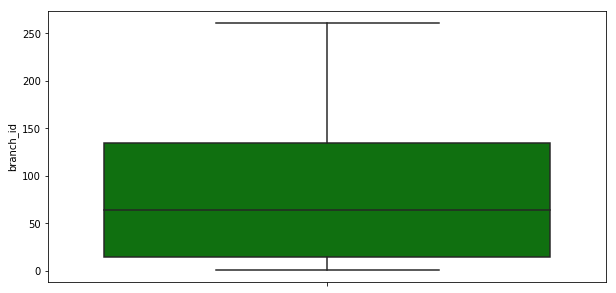

supplier_id


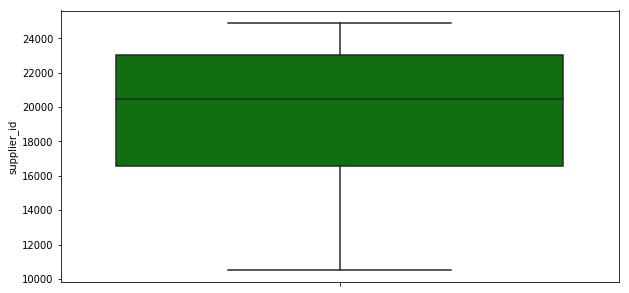

manufacturer_id


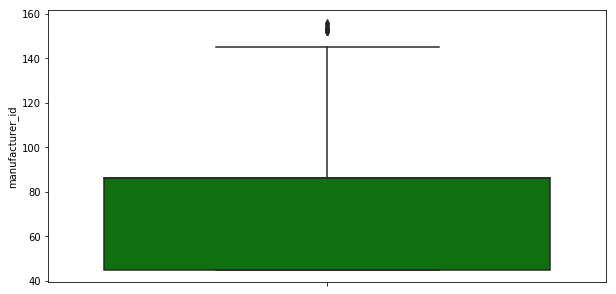

Current_pincode_ID


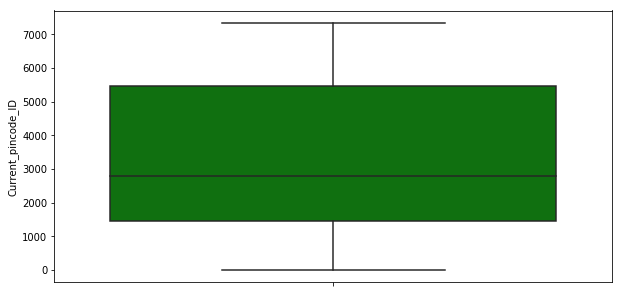

State_ID


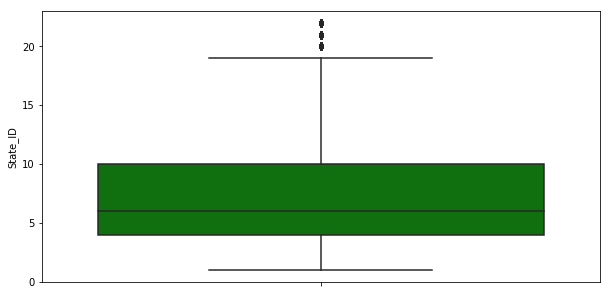

Employee_code_ID


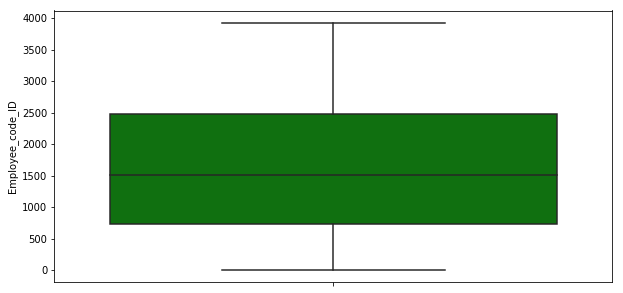

MobileNo_Avl_Flag


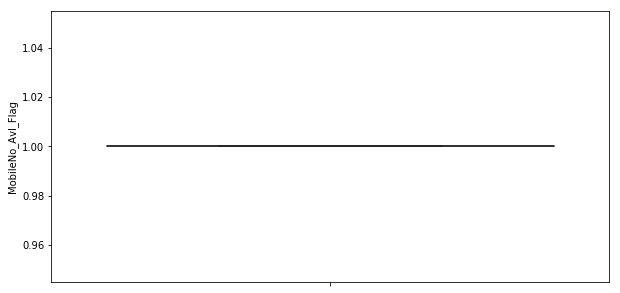

Aadhar_flag


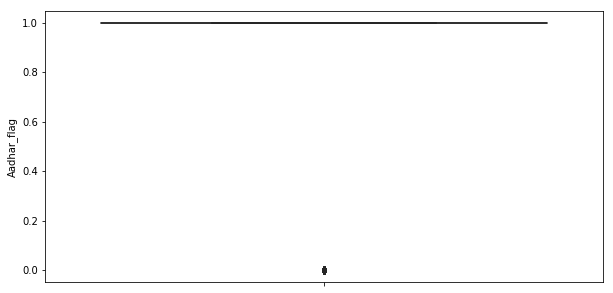

PAN_flag


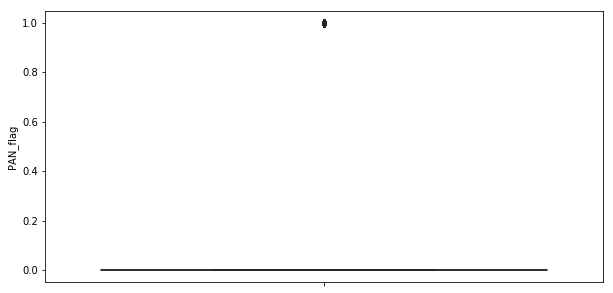

VoterID_flag


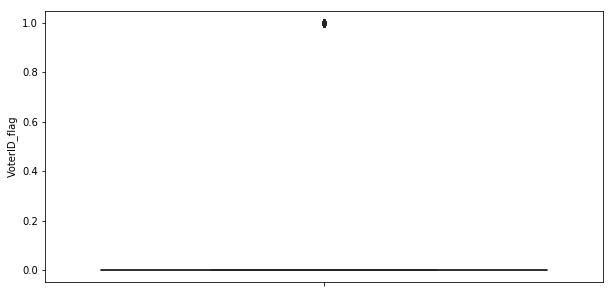

Driving_flag


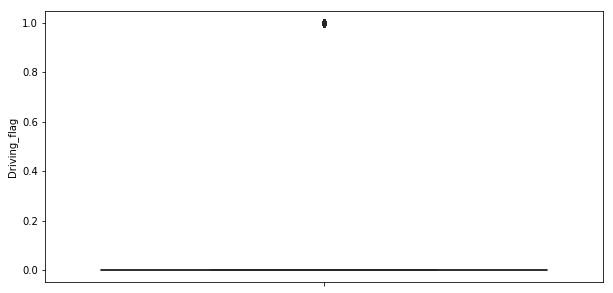

Passport_flag


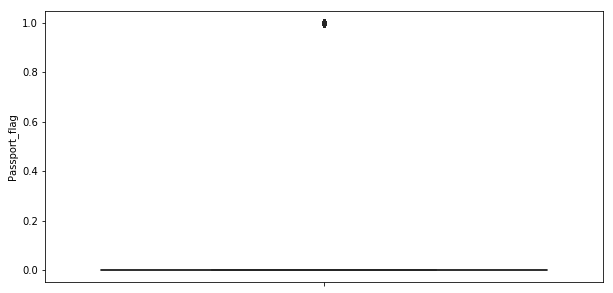

PERFORM_CNS.SCORE


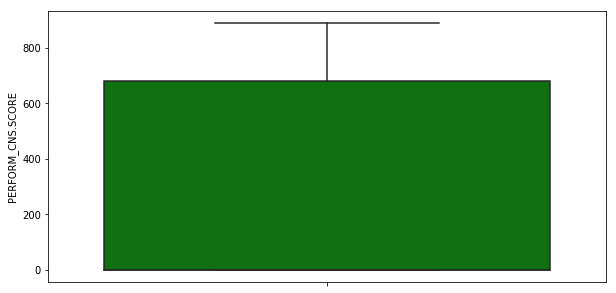

PRI.NO.OF.ACCTS


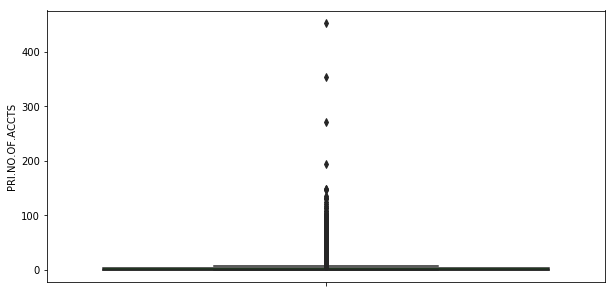

PRI.ACTIVE.ACCTS


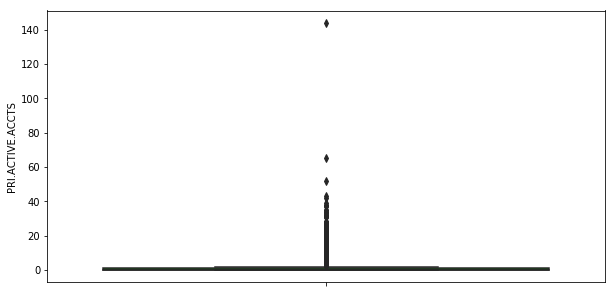

PRI.OVERDUE.ACCTS


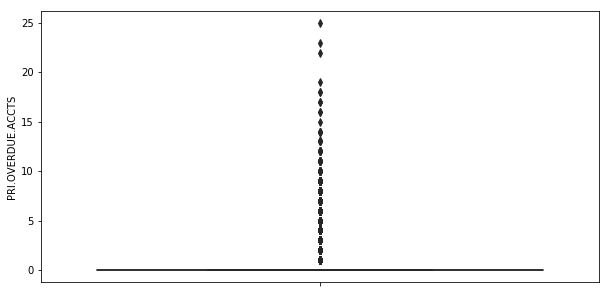

PRI.CURRENT.BALANCE


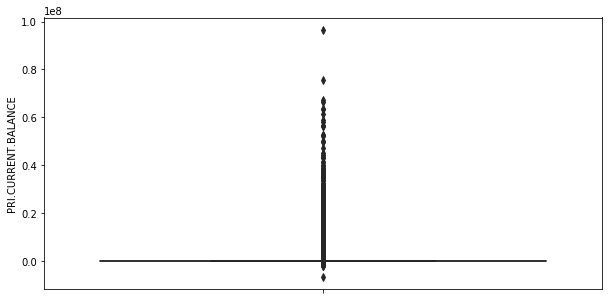

PRI.SANCTIONED.AMOUNT


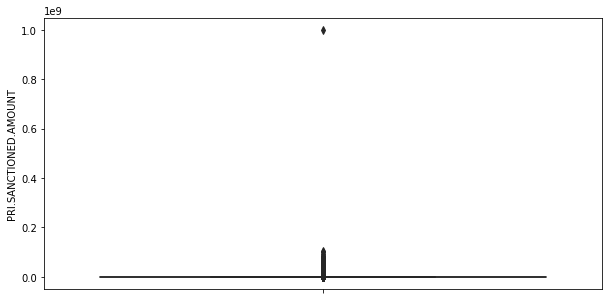

PRI.DISBURSED.AMOUNT


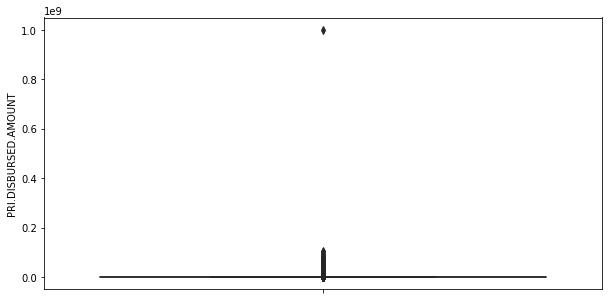

SEC.NO.OF.ACCTS


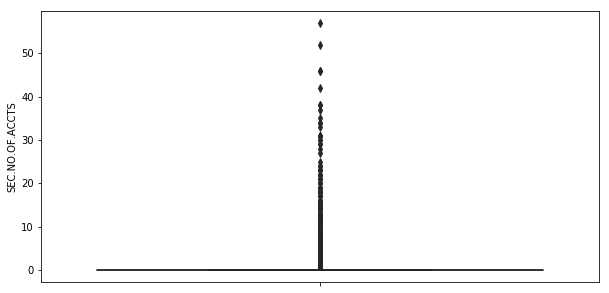

SEC.ACTIVE.ACCTS


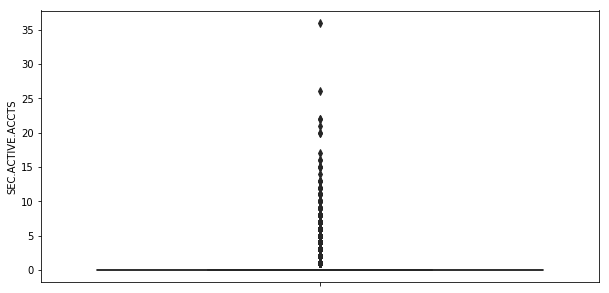

SEC.OVERDUE.ACCTS


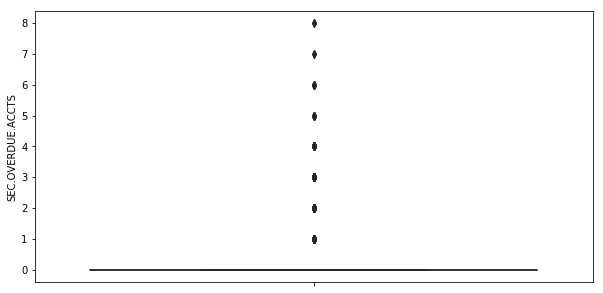

SEC.CURRENT.BALANCE


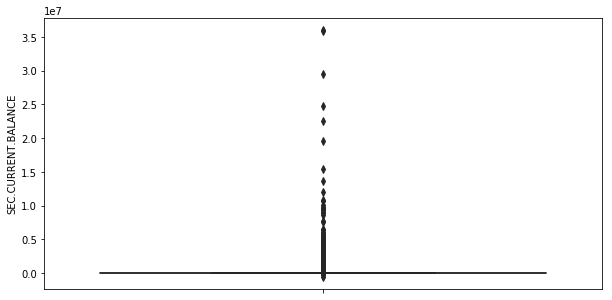

SEC.SANCTIONED.AMOUNT


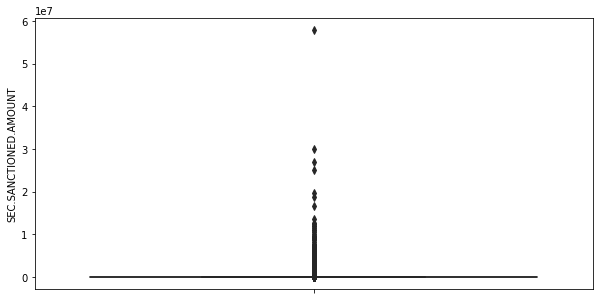

SEC.DISBURSED.AMOUNT


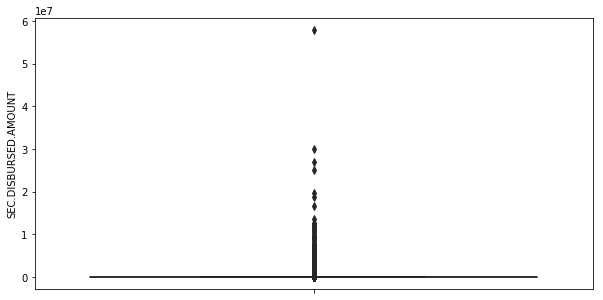

PRIMARY.INSTAL.AMT


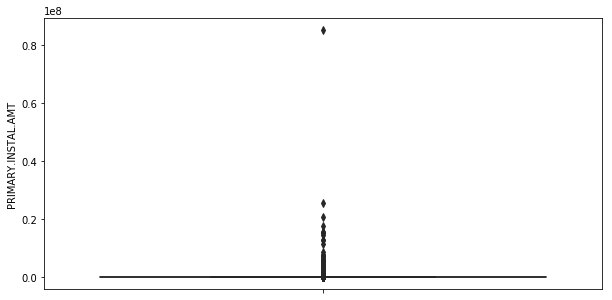

SEC.INSTAL.AMT


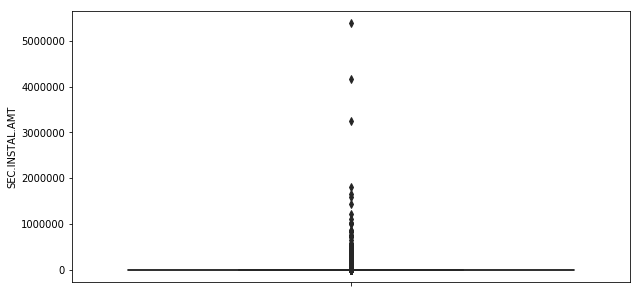

NEW.ACCTS.IN.LAST.SIX.MONTHS


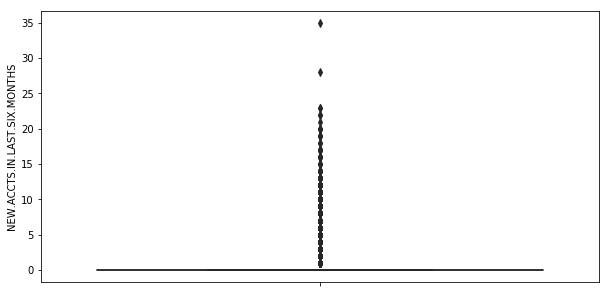

DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS


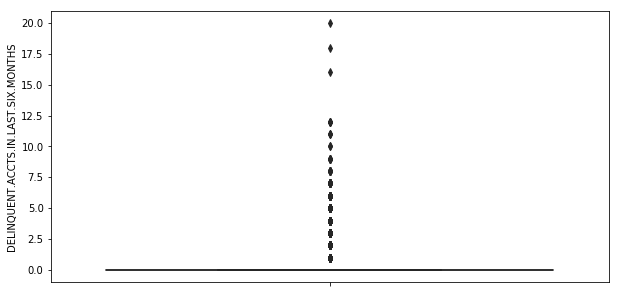

NO.OF_INQUIRIES


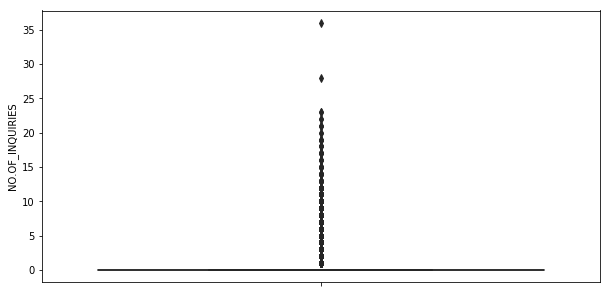

is_train


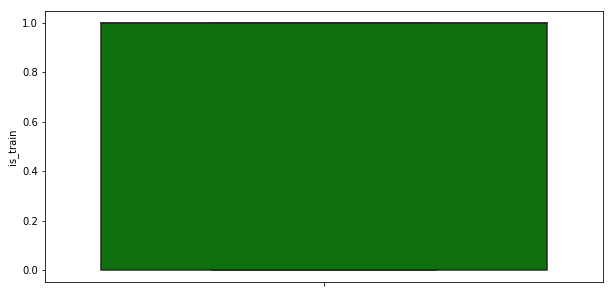

In [232]:
for i, feature in enumerate(numerical_combined_df.columns):
    print(feature)
    sns.boxplot(numerical_combined_df[feature], color = 'green', orient = 'v')
    plt.show()



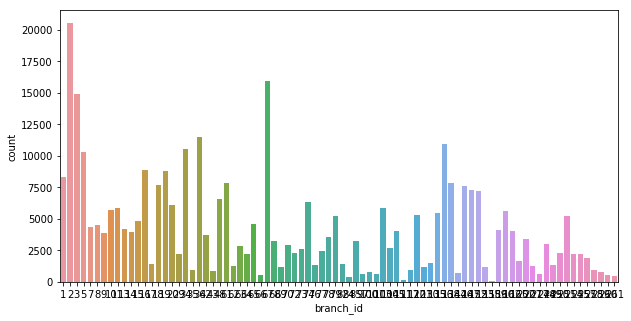

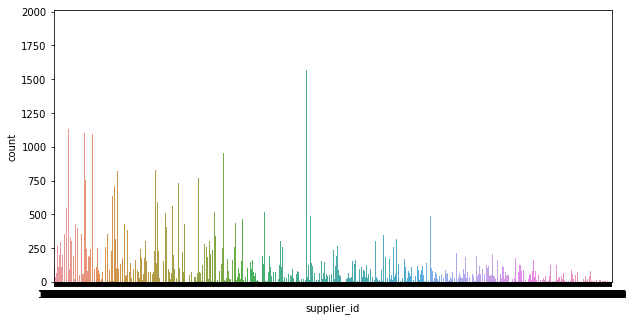

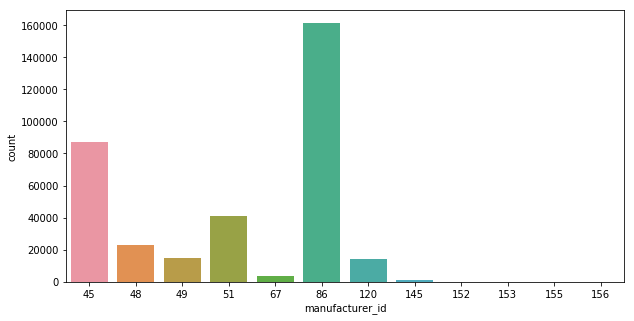

In [233]:
for i, feature in enumerate(various_ids):
    plt.figure(i)
    sns.countplot(numerical_combined_df[feature])
    


### Feature Engineering

In [493]:
combined_df.head(25)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,is_train
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,1
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,16-09-18,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,1
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,05-09-18,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,1
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,16-09-18,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,1


In [494]:
#CREDIT.HISTORY.LENGTH and AVERAGE.ACCT.AGE in terms of integer features

combined_df['AVERAGE.ACCT.AGE.MONTHS'] = combined_df['AVERAGE.ACCT.AGE'].str.split(' ').str.get(1).str.split('mon').str.get(0).astype('int64') + combined_df['AVERAGE.ACCT.AGE'].str.split(' ').str.get(0).str.split('yrs').str.get(0).astype('int64')*12

combined_df['CREDIT.HISTORY.LENGTH.MONTHS'] = combined_df['CREDIT.HISTORY.LENGTH'].str.split(' ').str.get(1).str.split('mon').str.get(0).astype('int64') + combined_df['CREDIT.HISTORY.LENGTH'].str.split(' ').str.get(0).str.split('yrs').str.get(0).astype('int64')*12



combined_df.ix[:,['CREDIT.HISTORY.LENGTH.MONTHS', 'AVERAGE.ACCT.AGE.MONTHS']].head(15)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,CREDIT.HISTORY.LENGTH.MONTHS,AVERAGE.ACCT.AGE.MONTHS
0,0,0
1,23,23
2,0,0
3,15,8
4,0,0
5,24,21
6,0,0
7,2,2
8,56,56
9,19,19


In [495]:
#Creating a new feature: AVG_NO_OF_ACCOUNTS

combined_df[(combined_df['AVERAGE.ACCT.AGE.MONTHS'] == 0 )].loc[:, 'CREDIT.HISTORY.LENGTH.MONTHS'].describe()
#the above expression gives that there is a chance of CREDIT.HISTORY.LENGTH.MONTHS > 0 if AVERAGE.ACCT.AGE.MONTHS == 0


combined_df['AVG_NO_OF_ACCOUNTS_CLEARED'] = combined_df['CREDIT.HISTORY.LENGTH.MONTHS'] / combined_df ['AVERAGE.ACCT.AGE.MONTHS']

combined_df = combined_df.replace([np.inf, -np.inf], np.nan)

combined_df['AVG_NO_OF_ACCOUNTS_CLEARED'] = combined_df['AVG_NO_OF_ACCOUNTS_CLEARED'].fillna(0)

combined_df.ix[:,['CREDIT.HISTORY.LENGTH.MONTHS', 'AVERAGE.ACCT.AGE.MONTHS', 'AVG_NO_OF_ACCOUNTS_CLEARED']].head(15)

combined_df['AVG_NO_OF_ACCOUNTS_CLEARED'].describe()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


count    345546.000000
mean          0.904573
std           1.218982
min           0.000000
25%           0.000000
50%           0.000000
75%           1.555556
max          53.500000
Name: AVG_NO_OF_ACCOUNTS_CLEARED, dtype: float64

In [496]:
# Creating a new feature PERCENTAGE_OF_PRIMARY_OVERDUE_ACCOUNTS and PERCENTAGE_OF_SECONDARY_OVERDUE_ACCOUNTS
combined_df['PERCENTAGE_OF_PRIMARY_OVERDUE_ACCOUNTS'] = (combined_df['PRI.OVERDUE.ACCTS'] / combined_df['PRI.NO.OF.ACCTS']).fillna(0)

combined_df['PERCENTAGE_OF_SECONDARY_OVERDUE_ACCOUNTS'] = (combined_df['SEC.OVERDUE.ACCTS'] / combined_df['SEC.NO.OF.ACCTS']).fillna(0)


combined_df.head(25)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,is_train,AVERAGE.ACCT.AGE.MONTHS,CREDIT.HISTORY.LENGTH.MONTHS,AVG_NO_OF_ACCOUNTS_CLEARED,PERCENTAGE_OF_PRIMARY_OVERDUE_ACCOUNTS,PERCENTAGE_OF_SECONDARY_OVERDUE_ACCOUNTS
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,0,0,0.000000,0.000000,0.0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,23,23,1.000000,1.000000,0.0
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,0,0,0.000000,0.000000,0.0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,8,15,1.875000,0.000000,0.0
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0,0,0.000000,0.000000,0.0
5,518279,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,1,21,24,1.142857,0.000000,0.0
6,529269,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,0,0,0.000000,0.000000,0.0
7,510278,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,16-09-18,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,1,2,2,1.000000,0.000000,0.0
8,490213,53713,61973,89.56,67,22807,45,1497,15-11-91,Self employed,05-09-18,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,1,56,56,1.000000,0.000000,0.0
9,510980,52603,61300,86.95,67,22807,45,1492,01-06-68,Salaried,16-09-18,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,1,19,19,1.000000,0.000000,0.0


In [497]:
#Creating a new feature Age


def get_datetime(date):
    parsed_date = datetime.strptime(date, '%d-%m-%y')
    
    if ((parsed_date - datetime.now()) > timedelta(days=0)):
        parsed_date = parsed_date.replace(year=(parsed_date.year -100))
        
        
    return parsed_date





combined_df['Date.of.Birth'] = combined_df['Date.of.Birth'].apply(get_datetime)

combined_df['DisbursalDate'] = combined_df['DisbursalDate'].apply(get_datetime)

#combined_df['DisbursalDate'] - 

combined_df['Date.of.Birth']

combined_df['Age'] = (combined_df['DisbursalDate'] - combined_df['Date.of.Birth']).dt.days
combined_df['Age'].describe()

count    345546.000000
mean      12633.719606
std        3600.036307
min        6574.000000
25%        9644.000000
50%       11984.000000
75%       15208.000000
max       25248.000000
Name: Age, dtype: float64

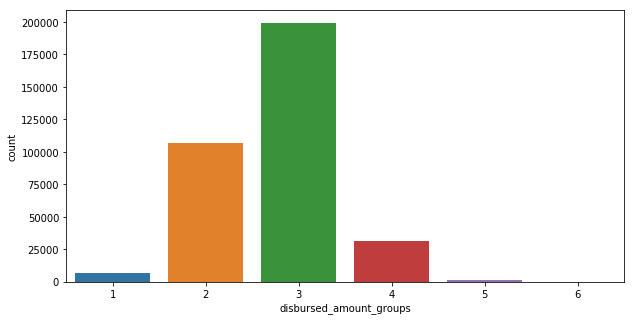

In [498]:
#disbursed_amount
combined_df[combined_df['disbursed_amount'] > 200000]


##on comparing these it is found that there are only 4 entries in test data for disbursed_amount > 200000 
##which is never getting defaulted. Looks like an outlier, thus creating another categorical feature to address this in 
## trees.

combined_df['disbursed_amount_groups'] = pd.cut(combined_df['disbursed_amount'],
                     bins=[0, 30000, 50000, 70000, 100000, 200000, combined_df['disbursed_amount'].max()],
                     labels=[1, 2, 3, 4, 5, 6]).astype('int64')

sns.countplot(combined_df['disbursed_amount_groups'])

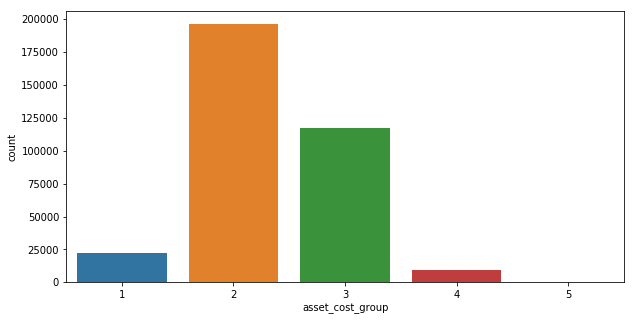

In [499]:
#asset_cost
combined_df['asset_cost'].describe()
combined_df.asset_cost.quantile(0.9)
combined_df.asset_cost.max()

#asset_cost had values from 37000 to 1628992 of which max values lay between 60k to 75k thus creating a new feature 
#for the type of vehicle. Here
# 1- second hand motorbikes
# 2- first hand motorbikes
# 3- second hand cars
# 4- first hand cars
# 5- expensive cars
combined_df['asset_cost_group'] = pd.cut(combined_df['asset_cost'],
                     bins=[combined_df.asset_cost.min()-1,60000 , 75000, 120000, 500000,
                           combined_df['asset_cost'].max()],
                     labels=[1, 2, 3, 4,5]).astype('int64')

sns.countplot(combined_df['asset_cost_group'])

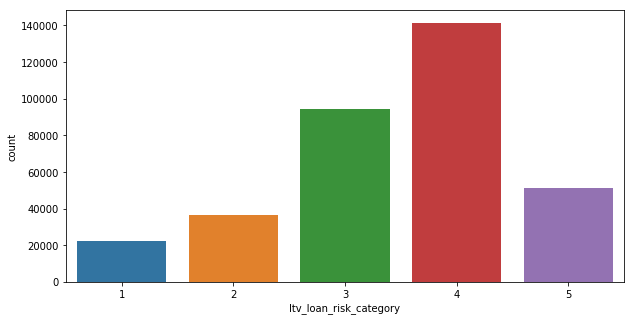

In [500]:
#ltv


combined_df['ltv'].describe()

#ltv had values from 10.03 to 95 of which max values lay between 60 to 85k thus creating a new feature 
#for the type of LTV. Here
# 1- <55 Extremely low LTV - less risky loan
# 2- 55-65 Low LTV
# 3- 65-75 Medium LTV
# 4- 75-85 High LTV
# 5- > 85 Extremely High LTV - more risky loan

combined_df['ltv_loan_risk_category'] = pd.cut(combined_df['ltv'],
                     bins=[combined_df.ltv.min()-1,55 , 65, 75, 85,
                           combined_df.ltv.max()],
                     labels=[1, 2, 3, 4,5]).astype('int64')

sns.countplot(combined_df['ltv_loan_risk_category'])

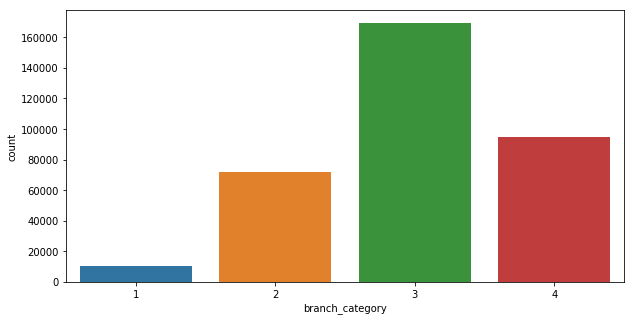

In [501]:
#branch_id

#there could be branches which giveaway large number of loans and have more probability in missing out 
#on the scrutiny process 



combined_df.groupby('branch_id').size().quantile(0.75)

combined_df ['count_of_loans_sanctioned_by_branch'] = combined_df.groupby('branch_id')['branch_id'].transform('size')

#generating a categorical feature for the same
#1 min() - 1000
#2 1000 - 4000
#3 4000 - 10000
# 10000 - max()
combined_df ['branch_category'] = pd.cut(combined_df['count_of_loans_sanctioned_by_branch'],
                     bins=[combined_df.count_of_loans_sanctioned_by_branch.min()-1, 1000, 4000 , 10000,
                           combined_df.count_of_loans_sanctioned_by_branch.max()],
                     labels=[1, 2, 3, 4]).astype('int64')

sns.countplot(combined_df['branch_category'])

## Handling missing values

In [503]:
combined_df.isnull().sum(axis = 0)

UniqueID                                        0
disbursed_amount                                0
asset_cost                                      0
ltv                                             0
branch_id                                       0
supplier_id                                     0
manufacturer_id                                 0
Current_pincode_ID                              0
Date.of.Birth                                   0
Employment.Type                             11104
DisbursalDate                                   0
State_ID                                        0
Employee_code_ID                                0
MobileNo_Avl_Flag                               0
Aadhar_flag                                     0
PAN_flag                                        0
VoterID_flag                                    0
Driving_flag                                    0
Passport_flag                                   0
PERFORM_CNS.SCORE                               0


UniqueID                                    0
disbursed_amount                            0
asset_cost                                  0
ltv                                         0
branch_id                                   0
supplier_id                                 0
manufacturer_id                             0
Current_pincode_ID                          0
Date.of.Birth                               0
Employment.Type                             0
DisbursalDate                               0
State_ID                                    0
Employee_code_ID                            0
MobileNo_Avl_Flag                           0
Aadhar_flag                                 0
PAN_flag                                    0
VoterID_flag                                0
Driving_flag                                0
Passport_flag                               0
PERFORM_CNS.SCORE                           0
PERFORM_CNS.SCORE.DESCRIPTION               0
PRI.NO.OF.ACCTS                   

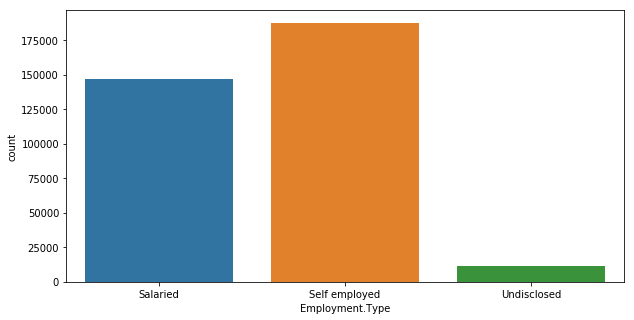

In [504]:
sns.countplot(combined_df['Employment.Type'])

combined_df['Employment.Type'].fillna('Undisclosed', inplace=True)

sns.countplot(combined_df['Employment.Type'])



combined_df.isnull().sum(axis = 0)

## Label Encoding

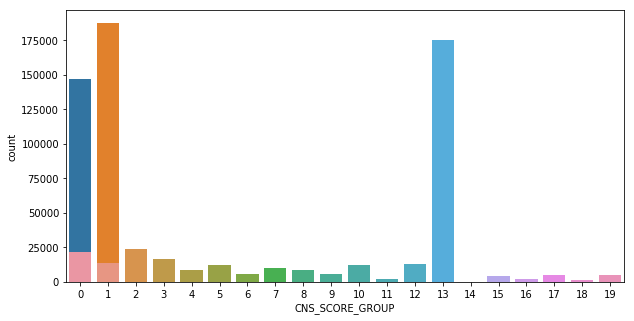

In [505]:
combined_df.head(25)

categorical_features = ["Employment.Type", "PERFORM_CNS.SCORE.DESCRIPTION"]

label_enc = LabelEncoder()

combined_df['Employment.Type'] = label_enc.fit_transform(combined_df['Employment.Type'])

sns.countplot(combined_df['Employment.Type'])

combined_df['CNS_SCORE_GROUP'] = label_enc.fit_transform(combined_df['PERFORM_CNS.SCORE.DESCRIPTION'])

sns.countplot(combined_df['CNS_SCORE_GROUP'])


In [506]:
combined_df.head(25)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,is_train,AVERAGE.ACCT.AGE.MONTHS,CREDIT.HISTORY.LENGTH.MONTHS,AVG_NO_OF_ACCOUNTS_CLEARED,PERCENTAGE_OF_PRIMARY_OVERDUE_ACCOUNTS,PERCENTAGE_OF_SECONDARY_OVERDUE_ACCOUNTS,Age,disbursed_amount_groups,asset_cost_group,ltv_loan_risk_category,count_of_loans_sanctioned_by_branch,branch_category,CNS_SCORE_GROUP
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,0,0,0.000000,0.000000,0.0,12633,3,1,5,15962,4,13
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,1,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,...,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,23,23,1.000000,1.000000,0.0,12110,2,2,3,15962,4,8
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,0,0,0.000000,0.000000,0.0,12030,3,2,5,15962,4,13
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,1,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,...,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,8,15,1.875000,0.000000,0.0,9066,3,2,5,15962,4,11
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,1,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0,0,0.000000,0.000000,0.0,14901,3,2,5,15962,4,13
5,518279,54513,61900,89.66,67,22807,45,1501,1990-09-08,1,2018-09-19,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,...,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,1,21,24,1.142857,0.000000,0.0,10238,3,2,5,15962,4,0
6,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,0,2018-09-23,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,0,0,0.000000,0.000000,0.0,11071,2,2,4,15962,4,13
7,510278,43894,61900,71.89,67,22807,45,1501,1989-10-04,0,2018-09-16,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,...,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,1,2,2,1.000000,0.000000,0.0,10574,2,2,3,15962,4,17
8,490213,53713,61973,89.56,67,22807,45,1497,1991-11-15,1,2018-09-05,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,...,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,1,56,56,1.000000,0.000000,0.0,9791,3,2,5,15962,4,3
9,510980,52603,61300,86.95,67,22807,45,1492,1968-06-01,0,2018-09-16,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,...,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,1,19,19,1.000000,0.000000,0.0,18369,3,2,5,15962,4,0


## Validation Split

In [507]:
train = combined_df [ combined_df['is_train'] == 1]
test = combined_df [ combined_df['is_train'] == 0]


#train.dtypes
train['loan_default'] = pd.read_csv('//Users//pranjal//Downloads//ltfs//train.csv')['loan_default']
train

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,is_train,AVERAGE.ACCT.AGE.MONTHS,CREDIT.HISTORY.LENGTH.MONTHS,AVG_NO_OF_ACCOUNTS_CLEARED,PERCENTAGE_OF_PRIMARY_OVERDUE_ACCOUNTS,PERCENTAGE_OF_SECONDARY_OVERDUE_ACCOUNTS,Age,disbursed_amount_groups,asset_cost_group,ltv_loan_risk_category,count_of_loans_sanctioned_by_branch,branch_category,CNS_SCORE_GROUP,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,0,2018-08-03,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,0,0,0.000000,0.000000,0.0,12633,3,1,5,15962,4,13,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,1,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,...,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,23,23,1.000000,1.000000,0.0,12110,2,2,3,15962,4,8,1
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,1,2018-08-01,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,0,0,0.000000,0.000000,0.0,12030,3,2,5,15962,4,13,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,1,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,...,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,8,15,1.875000,0.000000,0.0,9066,3,2,5,15962,4,11,1
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,1,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0,0,0.000000,0.000000,0.0,14901,3,2,5,15962,4,13,1
5,518279,54513,61900,89.66,67,22807,45,1501,1990-09-08,1,2018-09-19,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,...,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,1,21,24,1.142857,0.000000,0.0,10238,3,2,5,15962,4,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,0,2018-09-23,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,...,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1,0,0,0.000000,0.000000,0.0,11071,2,2,4,15962,4,13,0
7,510278,43894,61900,71.89,67,22807,45,1501,1989-10-04,0,2018-09-16,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,...,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,1,2,2,1.000000,0.000000,0.0,10574,2,2,3,15962,4,17,0
8,490213,53713,61973,89.56,67,22807,45,1497,1991-11-15,1,2018-09-05,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,...,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,1,56,56,1.000000,0.000000,0.0,9791,3,2,5,15962,4,3,0
9,510980,52603,61300,86.95,67,22807,45,1492,1968-06-01,0,2018-09-16,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,...,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,1,19,19,1.000000,0.000000,0.0,18369,3,2,5,15962,4,0,0


In [508]:
# for simplicity just dropping the non numeric features
train = train.drop(['Date.of.Birth', 'DisbursalDate', 'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], axis = 1)

test = test.drop(['Date.of.Birth', 'DisbursalDate', 'PERFORM_CNS.SCORE.DESCRIPTION', 'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH'], axis = 1)



In [509]:
train.dtypes


UniqueID                                      int64
disbursed_amount                              int64
asset_cost                                    int64
ltv                                         float64
branch_id                                     int64
supplier_id                                   int64
manufacturer_id                               int64
Current_pincode_ID                            int64
Employment.Type                               int64
State_ID                                      int64
Employee_code_ID                              int64
MobileNo_Avl_Flag                             int64
Aadhar_flag                                   int64
PAN_flag                                      int64
VoterID_flag                                  int64
Driving_flag                                  int64
Passport_flag                                 int64
PERFORM_CNS.SCORE                             int64
PRI.NO.OF.ACCTS                               int64
PRI.ACTIVE.A

In [534]:
evaluation_size = 0.1
kf = StratifiedKFold(train['loan_default'], round(1.0/evaluation_size))
train_indices, validation_indices = next (iter(kf))
X_train, y_train = train.ix[train_indices, :].drop('loan_default', axis = 1), train.ix[train_indices, 'loan_default']
X_valid, y_valid = train.ix[validation_indices, :].drop('loan_default', axis = 1), train.ix[validation_indices, 'loan_default']





## XGB model


In [513]:
model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric="auc", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

[0]	validation_0-auc:0.643634	validation_1-auc:0.624583
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.655049	validation_1-auc:0.634864
[2]	validation_0-auc:0.660408	validation_1-auc:0.638263
[3]	validation_0-auc:0.664648	validation_1-auc:0.639967
[4]	validation_0-auc:0.667105	validation_1-auc:0.641452
[5]	validation_0-auc:0.669116	validation_1-auc:0.642552
[6]	validation_0-auc:0.670466	validation_1-auc:0.643951
[7]	validation_0-auc:0.671791	validation_1-auc:0.645852
[8]	validation_0-auc:0.67349	validation_1-auc:0.647267
[9]	validation_0-auc:0.674438	validation_1-auc:0.64704
[10]	validation_0-auc:0.675815	validation_1-auc:0.647226
[11]	validation_0-auc:0.677134	validation_1-auc:0.647524
[12]	validation_0-auc:0.678539	validation_1-auc:0.648205
[13]	validation_0-auc:0.679649	validation_1-auc:0.648985
[14]	validation_0-auc:0.680552	validation_1-auc:0.649385


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.3, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=300, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=True, subsample=0.8)

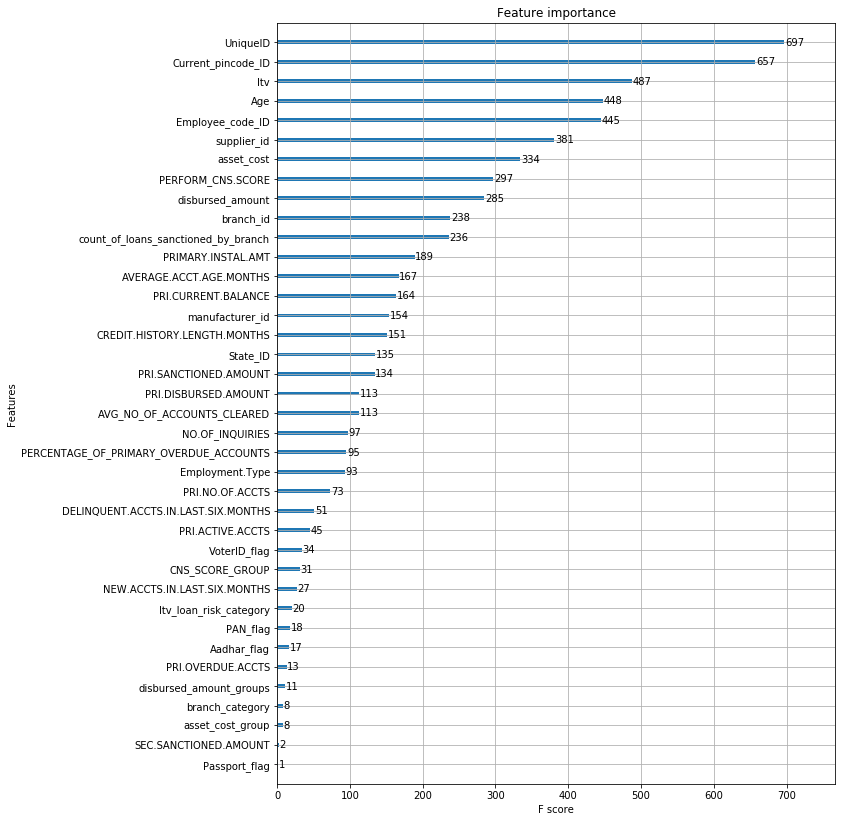

In [514]:
def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (10,14))

0.29914221

In [516]:
Y_test = model.predict(test).clip(0.0, 1.0)

Y_test.mean()

submission = pd.DataFrame({
    "UniqueID": test.UniqueID, 
    "loan_default": Y_test
})
submission.to_csv('xgb_submission_classifier.csv', index=False)



In [517]:
Y_test.mean()

0.29914221

## Feature Selection

In [529]:
from numpy import sort

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBRegressor()
    selection_model.fit(select_X_train, y_train, eval_metric="auc", verbose=True)
    # eval model
    select_X_valid = selection.transform(X_valid)
    y_pred = selection_model.predict(select_X_valid)
    predictions = y_pred.clip(0.0, 1.0)
    score = roc_auc_score(y_valid, predictions)
    print("Thresh=%.3f, n=%d, roc_auc_score: %.6f" % (thresh, select_X_train.shape[1], score))

Thresh=0.000, n=48, roc_auc_score: 0.654681
Thresh=0.000, n=48, roc_auc_score: 0.654681
Thresh=0.000, n=48, roc_auc_score: 0.654681
Thresh=0.000, n=48, roc_auc_score: 0.654681
Thresh=0.000, n=48, roc_auc_score: 0.654681
Thresh=0.000, n=48, roc_auc_score: 0.654681
Thresh=0.000, n=48, roc_auc_score: 0.654681
Thresh=0.000, n=48, roc_auc_score: 0.654681
Thresh=0.000, n=48, roc_auc_score: 0.654681
Thresh=0.000, n=48, roc_auc_score: 0.654681
Thresh=0.000, n=38, roc_auc_score: 0.654707
Thresh=0.000, n=37, roc_auc_score: 0.654707
Thresh=0.001, n=36, roc_auc_score: 0.654707
Thresh=0.001, n=36, roc_auc_score: 0.654707
Thresh=0.002, n=34, roc_auc_score: 0.654707
Thresh=0.002, n=33, roc_auc_score: 0.654707
Thresh=0.003, n=32, roc_auc_score: 0.654721
Thresh=0.003, n=31, roc_auc_score: 0.655397
Thresh=0.003, n=30, roc_auc_score: 0.655050
Thresh=0.004, n=29, roc_auc_score: 0.655050
Thresh=0.005, n=28, roc_auc_score: 0.654822
Thresh=0.005, n=27, roc_auc_score: 0.654601
Thresh=0.007, n=26, roc_auc_scor

## Training on selected features

In [566]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False, inplace=True)





selected_features = feat_importances[feat_importances >= 0.008].index

evaluation_size = 0.1
kf = StratifiedKFold(train['loan_default'], round(1.0/evaluation_size))
train_indices, validation_indices = next (iter(kf))
X_train, y_train = train.ix[train_indices, selected_features], train.ix[train_indices, 'loan_default']
X_valid, y_valid = train.ix[validation_indices, selected_features], train.ix[validation_indices, 'loan_default']



,UniqueID,Current_pincode_ID,ltv,Age,Employee_code_ID,supplier_id,asset_cost,PERFORM_CNS.SCORE,disbursed_amount,branch_id,count_of_loans_sanctioned_by_branch,PRIMARY.INSTAL.AMT,AVERAGE.ACCT.AGE.MONTHS,PRI.CURRENT.BALANCE,manufacturer_id,CREDIT.HISTORY.LENGTH.MONTHS,State_ID,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,AVG_NO_OF_ACCOUNTS_CLEARED,NO.OF_INQUIRIES,PERCENTAGE_OF_PRIMARY_OVERDUE_ACCOUNTS,Employment.Type,PRI.NO.OF.ACCTS
0,420825,1441,89.55,12633,1998,22807,58400,0,50578,67,15962,0,0,0,45,0,6,0,0,0.000000,0,0.000000,0,0
1,537409,1502,73.23,12110,1998,22807,65550,598,47145,67,15962,1991,23,27600,45,23,6,50200,50200,1.000000,0,1.000000,1,1
2,417566,1497,89.63,12030,1998,22807,61360,0,53278,67,15962,0,0,0,45,0,6,0,0,0.000000,0,0.000000,1,0
3,624493,1501,88.48,9066,1998,22807,66113,305,57513,67,15962,31,8,0,45,15,6,0,0,1.875000,1,0.000000,1,3
4,539055,1495,88.39,14901,1998,22807,60300,0,52378,67,15962,0,0,0,45,0,6,0,0,0.000000,1,0.000000,1,0
5,518279,1501,89.66,10238,1998,22807,61900,825,54513,67,15962,1347,21,0,45,24,6,0,0,1.142857,0,0.000000,1,2
6,529269,1502,76.42,11071,1998,22807,61500,0,46349,67,15962,0,0,0,45,0,6,0,0,0.000000,0,0.000000,0,0
7,510278,1501,71.89,10574,1998,22807,61900,17,43894,67,15962,0,2,72879,45,2,6,74500,74500,1.000000,0,0.000000,0,1
8,490213,1497,89.56,9791,1998,22807,61973,718,53713,67,15962,0,56,-41,45,56,6,365384,365384,1.000000,1,0.000000,1,1
9,510980,1492,86.95,18369,1998,22807,61300,818,52603,67,15962,2608,19,0,45,19,6,0,0,1.000000,0,0.000000,0,1


In [567]:
evaluation_size = 0.1
kf = StratifiedKFold(train['loan_default'], round(1.0/evaluation_size))
train_indices, validation_indices = next (iter(kf))
X_train, y_train = train.ix[train_indices, selected_features], train.ix[train_indices, 'loan_default']
X_valid, y_valid = train.ix[validation_indices, selected_features], train.ix[validation_indices, 'loan_default']

model = XGBRegressor(
    max_depth=8,
    n_estimators=1000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42)

model.fit(
    X_train, 
    y_train, 
    eval_metric="auc", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

[0]	validation_0-auc:0.631408	validation_1-auc:0.609231
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.654571	validation_1-auc:0.628264
[2]	validation_0-auc:0.661762	validation_1-auc:0.63312
[3]	validation_0-auc:0.665241	validation_1-auc:0.637525
[4]	validation_0-auc:0.667598	validation_1-auc:0.640255
[5]	validation_0-auc:0.669511	validation_1-auc:0.641433
[6]	validation_0-auc:0.671668	validation_1-auc:0.642668
[7]	validation_0-auc:0.673137	validation_1-auc:0.643431
[8]	validation_0-auc:0.674224	validation_1-auc:0.643468
[9]	validation_0-auc:0.675601	validation_1-auc:0.64489
[10]	validation_0-auc:0.676958	validation_1-auc:0.64568
[11]	validation_0-auc:0.67809	validation_1-auc:0.646206
[12]	validation_0-auc:0.679401	validation_1-auc:0.646593
[13]	validation_0-auc:0.680856	validation_1-auc:0.647679
[14]	validation_0-auc:0.682072	validation_1-auc:0.648634
[1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.3, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=300, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=True, subsample=0.8)

## Hyper-parameter Tuning

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribut

ValueError: num must be 1 <= num <= 6, not 7

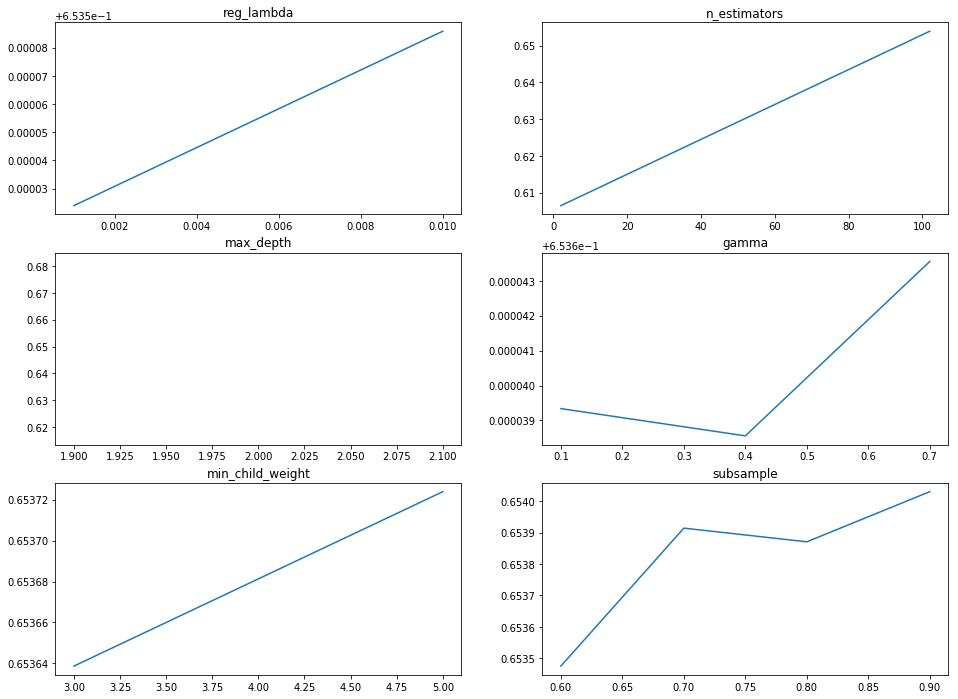

In [578]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer



# parameters and ranges to plot

param_grid = {
    #"eta": np.arange(0.01, 0.015, 0.05),
              "reg_lambda": [0.001, 0.01],
              "n_estimators": np.arange(2, 200, 100),
              "max_depth": np.arange(2, 3),
              
              "gamma": np.arange(0.1, 0.9, 0.3),
              "min_child_weight": np.arange(3, 7, 2),
              
              "subsample": np.arange(0.6, 0.9, 0.1),
              "colsample_bytree": np.arange(0.6, 0.9, 0.1),
              
              "reg_alpha": [0, 0.01, 0.5],
              "rate_drop": [0, 0.1, 0.2]}

model_tuned = XGBRegressor(random_state=7)


def evaluate_param(parameter, num_range, index):
    grid_search = GridSearchCV(model_tuned, param_grid = {parameter: num_range},
                               scoring=make_scorer(roc_auc_score))
    grid_search.fit(X_train, y_train)
    
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
       
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df



model_tuned = XGBRegressor(random_state=7)
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):   
    evaluate_param(parameter, param_range, index)
    index += 1

In [583]:
param_grid = {
    #"eta": np.arange(0.01, 0.015, 0.05),
              "reg_lambda": [0.01, 0.02],
              "n_estimators": [200, 300],
              #"max_depth": np.arange(2, 3),
              
              "gamma": [0.6],
              "min_child_weight": np.arange(3, 7, 2),
              
              "subsample": [0.7],
              "colsample_bytree": np.arange(0.6, 0.9, 0.1),
              
              "reg_alpha": [0, 0.01, 0.5],
              #"rate_drop": [0, 0.1, 0.2]
                }

grid_search = GridSearchCV(model_tuned, param_grid = param_grid,
                           scoring=make_scorer(roc_auc_score))
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [584]:
model = XGBRegressor(
    max_depth=8,
    n_estimators=300,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.7, 
    eta=0.3,    
    seed=42,
    gamma=0.3)

model.fit(
    X_train, 
    y_train, 
    eval_metric="auc", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

[0]	validation_0-auc:0.630931	validation_1-auc:0.615543
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.652861	validation_1-auc:0.633079
[2]	validation_0-auc:0.659057	validation_1-auc:0.636344
[3]	validation_0-auc:0.663025	validation_1-auc:0.638794
[4]	validation_0-auc:0.66555	validation_1-auc:0.640619
[5]	validation_0-auc:0.667273	validation_1-auc:0.641215
[6]	validation_0-auc:0.669654	validation_1-auc:0.642019
[7]	validation_0-auc:0.670826	validation_1-auc:0.642254
[8]	validation_0-auc:0.672529	validation_1-auc:0.6447
[9]	validation_0-auc:0.673321	validation_1-auc:0.645365
[10]	validation_0-auc:0.674856	validation_1-auc:0.646828
[11]	validation_0-auc:0.675832	validation_1-auc:0.647189
[12]	validation_0-auc:0.677503	validation_1-auc:0.647748
[13]	validation_0-auc:0.678827	validation_1-auc:0.648946
[14]	validation_0-auc:0.680249	validation_1-auc:0.649879
[

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.3, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=300, missing=None,
       n_estimators=300, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=True, subsample=0.7)

In [588]:


test = test.ix[:, selected_features]

Y_test = model.predict(test).clip(0.0, 1.0)

Y_test.mean()

submission = pd.DataFrame({
    "UniqueID": test.UniqueID, 
    "loan_default": Y_test
})
submission.to_csv('xgb_submission_final.csv', index=False)




/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
